# Singular Value Decomposition - explanation

Let's take M array we want to decompose.

In [1]:
import numpy as np

M = np.array([[1,0,0,0,2],
              [0,0,3,0,0],
              [0,0,0,0,0],
              [0,4,0,0,0]])

Let's check eigenvalues and eigenvectors of matrices $M^TM$ and $MM^T$ which are used to build V and U matrices respectively.

In [2]:
eigenvalues_v, V = np.linalg.eig(np.dot(M.transpose(),M))
eigenvalues_u, U = np.linalg.eig(np.dot(M,M.transpose()))
print "Eigenvalues of M^TM:"
print eigenvalues_v
print "Eigenvectors of M^TM - V matrix:"
print V
print
print "Eigenvalues of M^TM:"
print eigenvalues_u
print "Eigenvectors of MM^T - U matrix:"
print U

Eigenvalues of M^TM:
[ 0.  5. 16.  9.  0.]
Eigenvectors of M^TM - V matrix:
[[-0.89442719 -0.4472136   0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [ 0.4472136  -0.89442719  0.          0.          0.        ]]

Eigenvalues of M^TM:
[ 5.  9.  0. 16.]
Eigenvectors of MM^T - U matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Let's prepare sigma $\Sigma$ matrix by using squared and sorted eigenvalues of $M^TM$ matrix. $\Sigma$ matrix is of size M matrix.

In [3]:
Sigma = np.zeros(M.shape)
np.fill_diagonal(Sigma, np.sqrt(sorted(eigenvalues_v, reverse=True)))
Sigma

array([[4.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 3.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.23606798, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

Rearrange $V$ eigenvalues so they correspond to the proper eigenvalues of $\Sigma$ matrix.

In [4]:
indexes = np.argsort(eigenvalues_v)[::-1]
V_ordered = V[:,indexes]
V_ordered

array([[ 0.        ,  0.        , -0.4472136 ,  0.        , -0.89442719],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        , -0.89442719,  0.        ,  0.4472136 ]])

Calculate reversed $\Sigma$ matrix to calculate properly arranged $U$ matrix. In case $\Sigma$ is singular (i.e. is irrevertible) we calculate this by reversing values on the diagonal with $1/x$ function.

In [5]:
Sigma_inv = np.zeros(M.shape[::-1])
reverted_diagonal = [0 if i == 0 else 1/i for i in np.sqrt(sorted(eigenvalues_v, reverse=True))]
np.fill_diagonal(Sigma_inv, reverted_diagonal)
Sigma_inv

array([[0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.4472136 , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

Compare this with numpy $np.linalg.pinv()$ function.

In [6]:
np.linalg.pinv(Sigma)

array([[0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.4472136 , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

Calculate $U$ matrix with formula $U = MV\Sigma^{-1}$.

In [7]:
U_calculated = np.dot(np.dot(M,V_ordered), Sigma_inv)
U_calculated

array([[ 0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

Let's verify that our $M$ matrix can be reconstructed with $U$, $\Sigma$ and $V$ matrices.

In [8]:
M_reconstructed = np.dot(np.dot(U_calculated, Sigma), V_ordered.transpose())
M_reconstructed

array([[1., 0., 0., 0., 2.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 4., 0., 0., 0.]])

Comparing to original $M$ matrix.

In [9]:
print "M:"
print M
print "U:"
print U_calculated
print "Sigma:"
print Sigma
print "V:"
print V_ordered

M:
[[1 0 0 0 2]
 [0 0 3 0 0]
 [0 0 0 0 0]
 [0 4 0 0 0]]
U:
[[ 0.  0. -1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]]
Sigma:
[[4.         0.         0.         0.         0.        ]
 [0.         3.         0.         0.         0.        ]
 [0.         0.         2.23606798 0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
V:
[[ 0.          0.         -0.4472136   0.         -0.89442719]
 [ 1.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.         -0.89442719  0.          0.4472136 ]]


Results received by using $np.linalg.svd()$.

In [10]:
def create_diagonal_matrix(shape, diagonal_values):
  matrix = np.zeros(shape)
  np.fill_diagonal(matrix, diagonal_values)
  return matrix

U_np, Sigma_np, V_np = np.linalg.svd(M)
print "U:"
print U_np
print "Sigma:"
print Sigma_np
print "V:"
print V_np
M_svd_reconstructed = np.dot(
  np.dot(U_np,
         create_diagonal_matrix(M.shape, Sigma_np)),
  V_np)
print "M svd reconstructed:"
print M_svd_reconstructed

U:
[[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 1.  0.  0.  0.]]
Sigma:
[4.         3.         2.23606798 0.        ]
V:
[[-0.          1.          0.         -0.          0.        ]
 [-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]
M svd reconstructed:
[[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]]


Comparing $U_{calculated}$ to $U$ composed of eigenvectors from $MM^T$ matrix.

In [11]:
print "U_calculated:"
print U_calculated
indexes_u = np.argsort(eigenvalues_u)[::-1]
print "U_from_eigenvectors"
print U[:,indexes_u]

U_calculated:
[[ 0.  0. -1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]]
U_from_eigenvectors
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


Let's validate if $UU^T$ is an identity matrix.

In [12]:
np.dot(U_calculated, U_calculated.transpose())

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In the third column we can see missing one. Let's check $VV^T$ matrix.

In [13]:
np.dot(V_ordered, V_ordered.transpose())

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.25949234e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [-1.25949234e-17,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])

# Matrix conditioning

In [14]:
np.linalg.cond(U_calculated)

inf

In [15]:
np.linalg.cond(Sigma)

inf

In [16]:
np.linalg.cond(V_ordered)

1.0

In [17]:
np.linalg.cond(M)

inf

In [18]:
np.linalg.cond(M, -2)

0.0

## Calculating condition number for Hilbert matrix

Let's start from using numpy libraries for checking condition number.

In [19]:
from scipy.linalg import hilbert
hilbert_matrix = hilbert(10)
hilbert_matrix

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [20]:
np.linalg.cond(hilbert_matrix, 2)

16024413512628.9

In [21]:
np.linalg.cond(hilbert_matrix, 'fro')

16333640022240.15

In [22]:
np.linalg.norm(hilbert_matrix, 2)*np.linalg.norm(np.linalg.inv(hilbert_matrix), 2)

16026019477413.041

Calculating matrix conditioning with $\kappa (A)={\frac {\left|\lambda _{\max }(A)\right|}{\left|\lambda _{\min }(A)\right|}}$. First check if matrix is normal and satisfies $AA^* = A^*A$ equation.

In [23]:
(np.dot(hilbert_matrix, hilbert_matrix.transpose()) == np.dot(hilbert_matrix.transpose(), hilbert_matrix)).all()

True

In [24]:
eigenvalues_b = np.linalg.svd(hilbert_matrix, compute_uv=0)
max(eigenvalues_b)/min(eigenvalues_b)

16024413512628.9

In [25]:
random_matrix = np.random.rand(10,10)
random_matrix

array([[0.96707968, 0.20596914, 0.44414434, 0.57408887, 0.51101295,
        0.45137666, 0.90249071, 0.67128874, 0.96200836, 0.92422756],
       [0.29787447, 0.25074197, 0.64456714, 0.01799061, 0.19696038,
        0.81964766, 0.13676947, 0.25122202, 0.30003386, 0.91401066],
       [0.2035124 , 0.85771081, 0.75297378, 0.38898735, 0.77454965,
        0.91483754, 0.36607227, 0.44151031, 0.0184723 , 0.59338221],
       [0.87055897, 0.93203985, 0.93881728, 0.65803769, 0.2011472 ,
        0.47178319, 0.05040312, 0.45850154, 0.0695152 , 0.65468398],
       [0.8114385 , 0.09510931, 0.65268478, 0.37950268, 0.27838718,
        0.23383256, 0.87436153, 0.21114   , 0.78110455, 0.73564914],
       [0.24038654, 0.94500104, 0.37158027, 0.29025444, 0.68234505,
        0.55912584, 0.05781245, 0.30272439, 0.53064121, 0.5091014 ],
       [0.43772767, 0.87998834, 0.70959103, 0.36754155, 0.27073294,
        0.6069066 , 0.87105211, 0.35829493, 0.15916698, 0.8158279 ],
       [0.7260594 , 0.22939891, 0.5723165

In [26]:
np.linalg.cond(random_matrix, 2)

27.66281094711743

## SVD image loss compression

During image compression we can perform factorization and cut some less important noise from the image in order to make picture smaller. To do that we calculate $M = U \Sigma V^T$ where $\Sigma$ is created by putting eigenvalues $\lambda_i$ on diagonal matrix of size of $M$ matrix starting from the biggest values (most important) to the smallest values (least important). The smallest values symbolize the least set of information therefore cutting them off may cause the smallest damage.

If matrix $M$ is of size $n$ x $m$, there are at most $max(n,m)$ eigenvalues. The size of such picture is $nm$. The size of 3 matrices calculated from factorization is $m^2 + min(m,n) + n^2$ where the first addend is the size of $U$ matrix, second is the size of $\Sigma$ matrix (only diagonal values) and the third summand is the size of $V$ matrix. If we use only $k$ eigenvalues from matrix $\Sigma$ we can minimize these matrices to the summed size equal to $mk + k + nk$ which can be smaller than initial $mn$ size.

### Measuring corectness

The compression rate is can be calculated as: $\frac{mk + k + nk}{mn} = \frac{k(m+n+1)}{mn}$.

We can also use Peak Signal to Noise Ratio [2]. We can calculate this with following formula:

${PSNR}=10\cdot \log_{10} \left( \frac{{MAX}_{I}^2}{{MSE}}  \right)$

$=20\cdot \log_{10} \left( \frac{{MAX}_{I}}{\sqrt{MSE}}  \right)$

$=20\cdot \log_{10} \left( {MAX}_{I} \right) - 10\cdot \log_{10} \left( {MSE} \right)$

${MAX}_{I}$ is the maximum possible pixel value of the image. In this case, ${MAX}_{I} = 255^{2^3} = 255^8$ when there are three channels (red, green, blue) or ${MAX}_{I} = 255^{2^4} = 255^16$ if there is also the channel of transparence. We can simplify first term of the ${PSNR}$ equation by pulling exponent number to the front of the logarithmic equation $20\cdot \log_{10} \left( {MAX}_{I} \right) = 20 \cdot 2 \cdot {number\_of\_channels} \cdot \log_{10} \left( 255 \right)$. Also, ${MSE}$ term is calculated with following equation:

${\mathit  {MSE}}={\frac  {1}{m\,n\,c}}\sum _{{i=0}}^{{c-1}}\sum _{{i=0}}^{{m-1}}\sum _{{j=0}}^{{n-1}}[I(i,j)-K(i,j)]^{2}$,

considering $I$ as an original picture and $K$ as a reconstruction.


### Improvements

#### Splitting Image into Smaller Blocks

If we perform svd compression on images with huge variety of colours and objects we can lose a lot of information if we cut some eigenvalues. We can consider splitting image into smaller blocks (eg. 64x64 or 8x8) and perform svd on these smaller pieces. If image consists of many different objects with different themes it is potentially easier to represent perform factorization on smaller blocks instead of one big block.

#### Rank-One Update

We can also consider calculation of mean value of the image and subtract this from all pixels. Mean value is not as significant as contrast values. It's easy to subtract this information before starting image processing and adding that back again after all.

### References

[1] http://fourier.eng.hmc.edu/e161/lectures/svdcompression.html

[2] https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import data
import os

def mean_squered_error(original_image, reconstruction_image):
  x, y, z = original_image.shape
  divider = (x*y*z)
  sum = 0
  for i in xrange(0, x):
    for j in xrange(0, y):
      for k in xrange(0, z):
        diff = int(original_image[i,j,k]) - reconstruction_image[i,j,k]
        sum += diff*diff
  return float(sum) / (x*y*z)

def peak_signal_to_noise_ration(original_image, reconstruction_image):
  x, y, z = original_image.shape
  return 20*2*z*np.log10(255) - 10*np.log10(mean_squered_error(original_image, reconstruction_image))

def svd_compression(image, k, batch_size=None, rank_one_update=False):
  original_image = image
  if rank_one_update:
    mean = np.mean(np.mean(image))
    image = image - mean
  image_picture_shape = image.shape[:2]
  image_transposed = image.transpose((2,0,1))
  
  x_max, y_max, colour_max = image.shape
   
  image_svd = [[np.linalg.svd(colour[j:min(j+batch_size, x_max),
                                     i:min(i+batch_size, y_max)])
                for j in range(0, x_max, batch_size)
                for i in range(0, y_max, batch_size)] if batch_size else [np.linalg.svd(colour)]
               for colour in image_transposed]
  
  cells_counter = 0
  image_reconstructed_transposed = np.zeros(image.shape, dtype=np.uint8)
  for colour_id in xrange(0, colour_max):
    batches_per_x = (y_max-1) / batch_size + 1 if batch_size else 1
    batches_num = len(image_svd[0])
    for batch_id in xrange(0, batches_num):
      batch = image_svd[colour_id][batch_id]
      new_k = min(k, len(batch[1]))
      
      image_batch_reconstruction = np.array([np.dot(
          np.dot(batch[0][:,:new_k],
                 create_diagonal_matrix((new_k,new_k), batch[1][:new_k])),
          batch[2][:new_k])])
      cells_counter += new_k*(batch[0].shape[0]+1+batch[2].shape[1])
      
      if batch_size:
        new_x1 = (batch_id/batches_per_x)*batch_size
        new_x2 = min(((batch_id/batches_per_x)+1)*batch_size, x_max)
        new_y1 = (batch_id%batches_per_x)*batch_size
        new_y2 = min(((batch_id%batches_per_x)+1)*batch_size, y_max)

        image_reconstructed_transposed[new_x1:new_x2,
                                       new_y1:new_y2,
                                      colour_id] = image_batch_reconstruction
      else:
        image_reconstructed_transposed[:,:,colour_id] = image_batch_reconstruction
  if rank_one_update:
    image_reconstructed_transposed = np.array(image_reconstructed_transposed + mean, dtype=np.uint8)
  return (image_reconstructed_transposed,
          float(cells_counter) / (x_max*y_max*colour_max),
          peak_signal_to_noise_ration(original_image, image_reconstructed_transposed),
          k,
          batch_size)

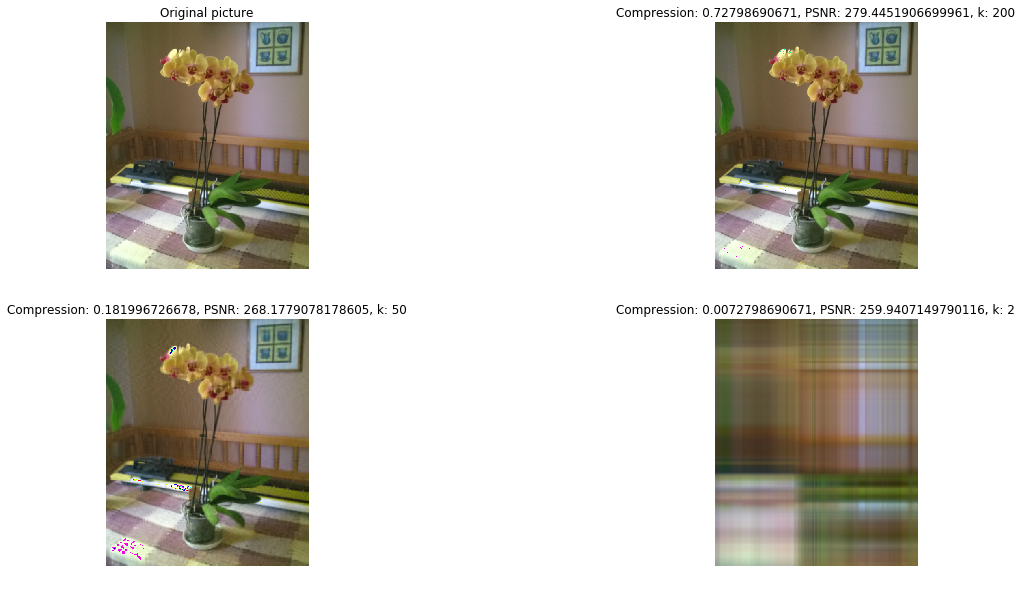

In [28]:
orchis = data.load(os.getcwd() + "/orchis.png")
images = [orchis,
          svd_compression(orchis, 200),
          svd_compression(orchis, 50),
          svd_compression(orchis, 2)]

plt.rcParams["figure.figsize"] = (20,10)
plt.subplots(nrows=2, ncols=2)

plt.subplot(2, 2, 1)
plt.title("Original picture")
plt.imshow(images[0])
plt.axis('off')

for i in xrange(1,4):
  plt.subplot(2, 2, i+1)
  plt.title("Compression: %s, PSNR: %s, k: %s" % images[i][1:4])
  plt.imshow(images[i][0])
  plt.axis('off')
plt.show()

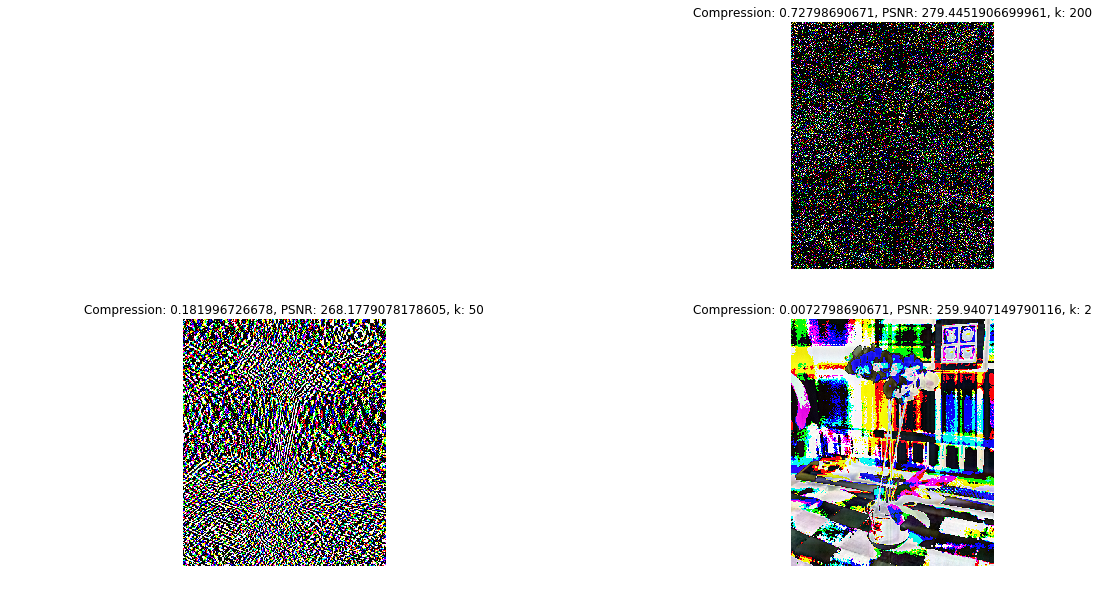

In [29]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplots(nrows=2, ncols=2)
plt.subplot(2, 2, 1)
plt.axis('off')

for i in xrange(1,4):
  plt.subplot(2, 2, i+1)
  plt.title("Compression: %s, PSNR: %s, k: %s" % images[i][1:4])
  plt.imshow(images[0] - images[i][0])
  plt.axis('off')
plt.show()

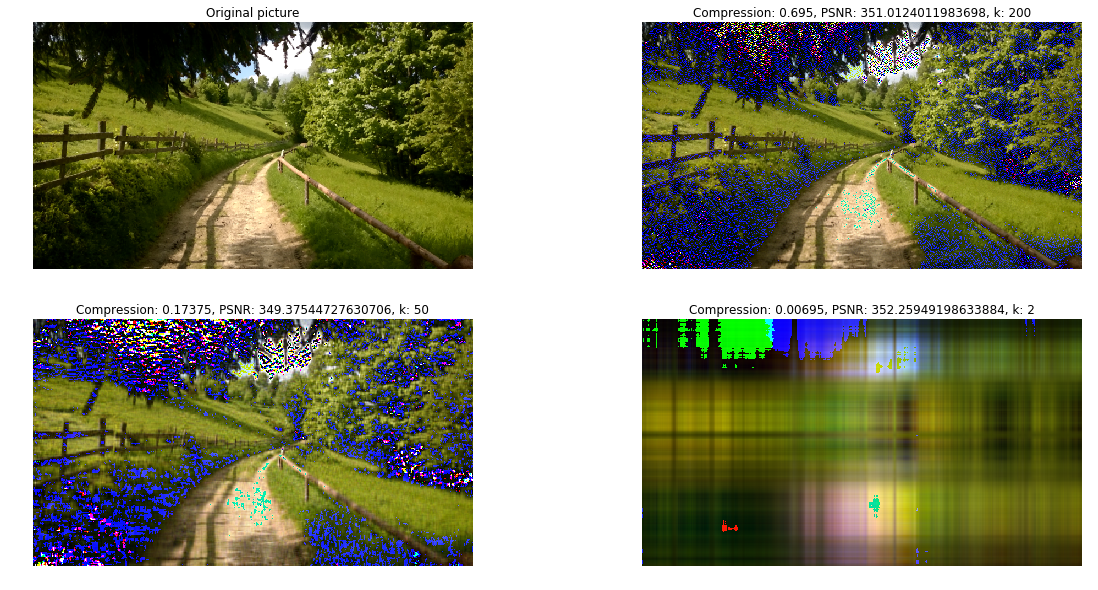

In [30]:
road = data.load(os.getcwd() + "/road.png")
images = [road,
          svd_compression(road, 200),
          svd_compression(road, 50),
          svd_compression(road, 2)]

plt.rcParams["figure.figsize"] = (20,10)
plt.subplots(nrows=2, ncols=2)

plt.subplot(2, 2, 1)
plt.title("Original picture")
plt.imshow(images[0])
plt.axis('off')

for i in xrange(1,4):
  plt.subplot(2, 2, i+1)
  plt.title("Compression: %s, PSNR: %s, k: %s" % images[i][1:4])
  plt.imshow(images[i][0])
  plt.axis('off')
plt.show()

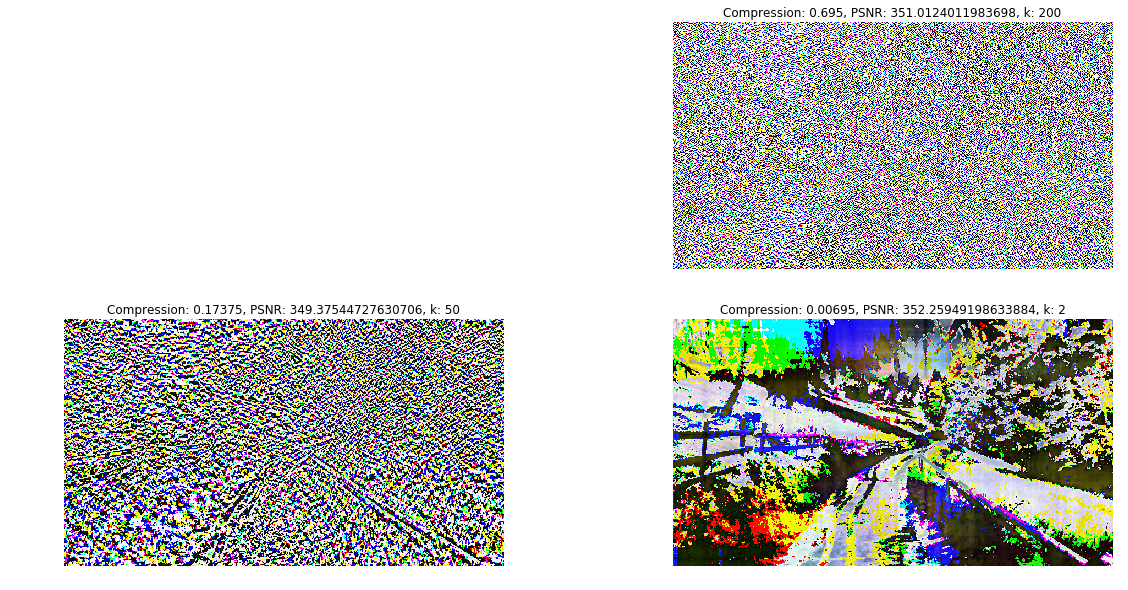

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplots(nrows=2, ncols=2)
plt.subplot(2, 2, 1)
plt.axis('off')

for i in xrange(1,4):
  plt.subplot(2, 2, i+1)
  plt.title("Compression: %s, PSNR: %s, k: %s" % images[i][1:4])
  plt.imshow(255 - (images[0] - images[i][0]))
  plt.axis('off')
plt.show()

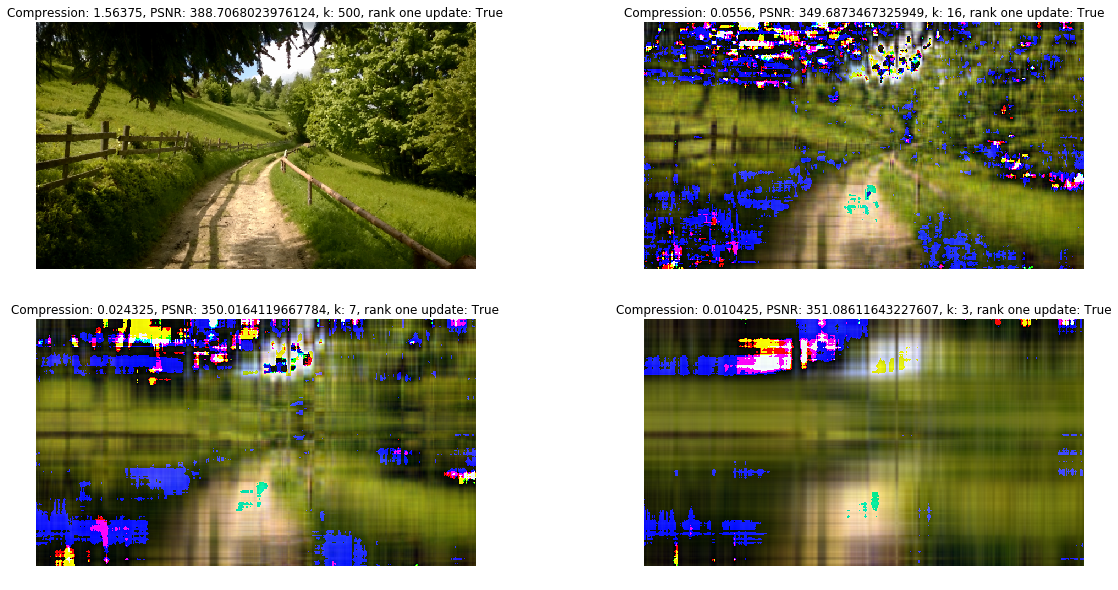

In [32]:
images = [svd_compression(road, 500, rank_one_update=True),
        svd_compression(road, 16, rank_one_update=True),
        svd_compression(road, 7, rank_one_update=True),
        svd_compression(road, 3, rank_one_update=True)]
plt.rcParams["figure.figsize"] = (20,10)
plt.subplots(nrows=2, ncols=2)
for i in xrange(len(images)):
  plt.subplot(2, 2, i+1)
  plt.title("Compression: %s, PSNR: %s, k: %s, rank one update: True" % images[i][1:4])
  plt.imshow(images[i][0])
  plt.axis('off')
plt.show()

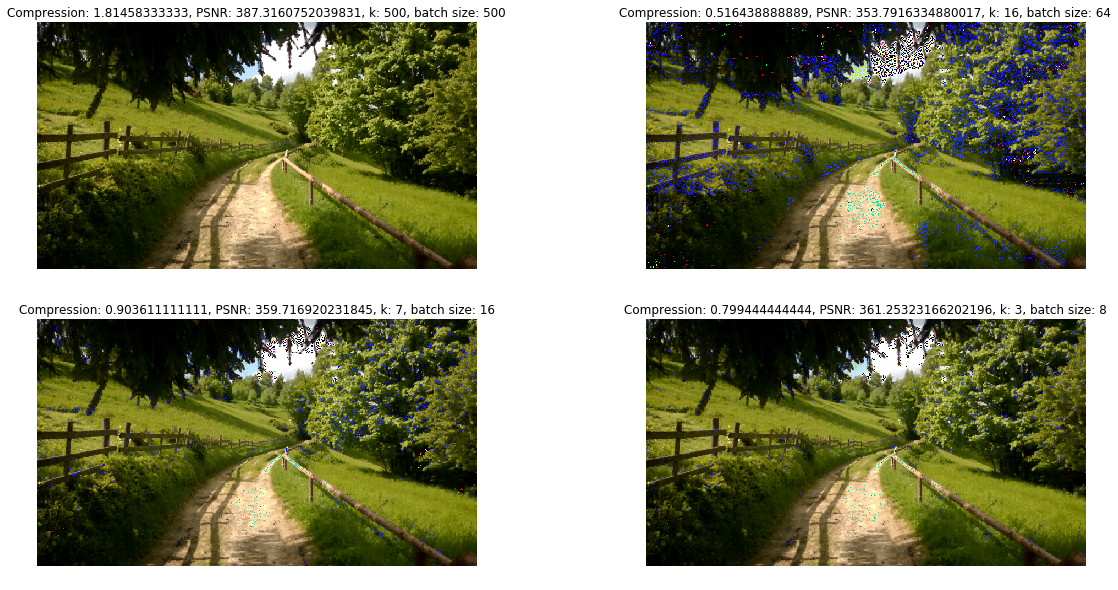

In [33]:
images = [svd_compression(road, 500, 500),
        svd_compression(road, 16, 64),
        svd_compression(road, 7, 16),
        svd_compression(road, 3, 8)]
plt.rcParams["figure.figsize"] = (20,10)
plt.subplots(nrows=2, ncols=2)
for i in xrange(len(images)):
  plt.subplot(2, 2, i+1)
  plt.title("Compression: %s, PSNR: %s, k: %s, batch size: %s" % images[i][1:])
  plt.imshow(images[i][0])
  plt.axis('off')
plt.show()

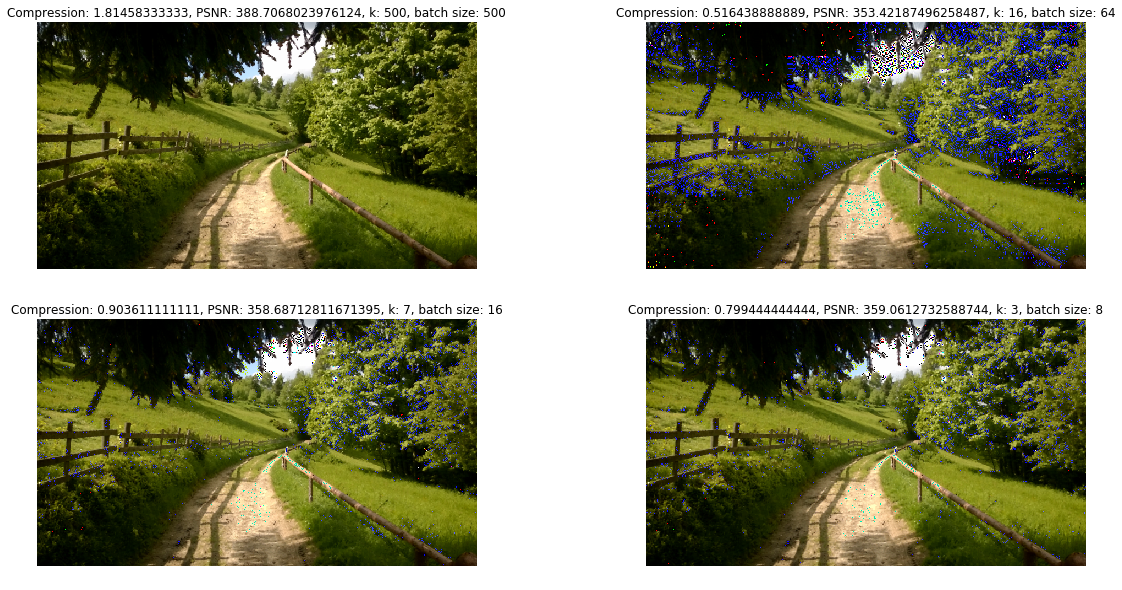

In [34]:
images = [svd_compression(road, 500, 500, rank_one_update=True),
        svd_compression(road, 16, 64, rank_one_update=True),
        svd_compression(road, 7, 16, rank_one_update=True),
        svd_compression(road, 3, 8, rank_one_update=True)]
plt.rcParams["figure.figsize"] = (20,10)
plt.subplots(nrows=2, ncols=2)
for i in xrange(len(images)):
  plt.subplot(2, 2, i+1)
  plt.title("Compression: %s, PSNR: %s, k: %s, batch size: %s" % images[i][1:])
  plt.imshow(images[i][0])
  plt.axis('off')
plt.show()